In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import time
import collections
import pandas
import pylab as pl
from pandas.plotting import scatter_matrix
from pylab import *
from tqdm.auto import tqdm

import statsmodels.formula.api as smf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = [9, 5]
sns.set(rc={'figure.figsize': (6, 3)})

tqdm.pandas()


# Code for pre-processing data

In [41]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [42]:
%matplotlib inline

In [43]:
df_1 = pd.read_csv('zomato.csv', encoding = 'latin-1')
df_1.shape

(9551, 22)

In [44]:
df_1.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Phillipines,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Phillipines,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Phillipines,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Phillipines,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


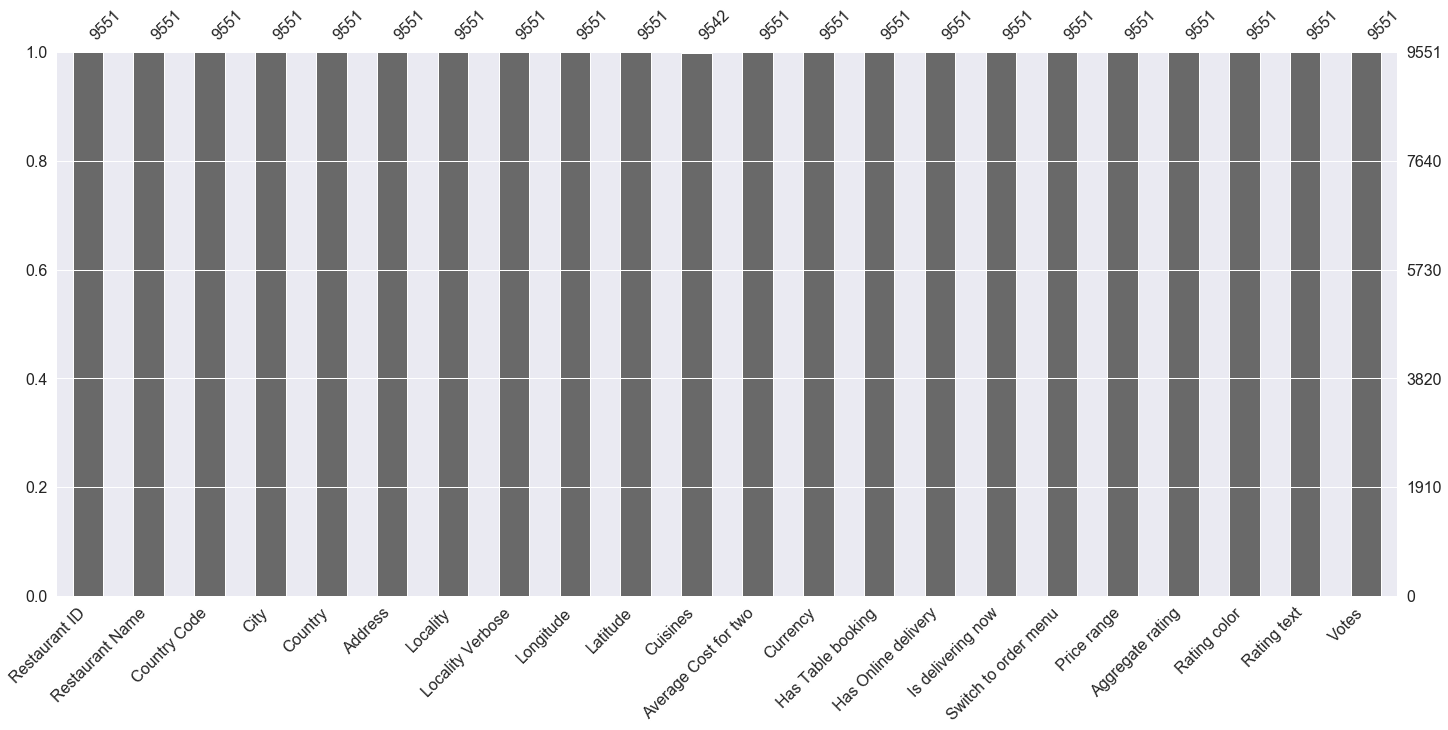

In [45]:
#Checking for null values
msno.bar(df_1)

In [46]:
df_1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Country',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [47]:
#Checking data type
df_1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Country                  object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [48]:
#Checking unique values
df_1.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Country                   15
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [49]:
from sklearn.utils import shuffle
df_1 = shuffle(df_1) #Shuffling the data

# Check country-wise count of reviews

In [50]:
df_1.groupby('Country').size().reset_index(name='Count')

,Country,Count
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8652
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [51]:
#Selecting appropriate dataset as per findings
dfIndia = df_1[df_1['Country Code']==1]
dfIndia = dfIndia.reset_index(drop=True) #resetting the indices
dfIndia.head(n=3)

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18277024,Shang Palace - Shangri-La's Eros Hotel,1,New Delhi,India,"Shangri-La's Eros Hotel, 19, Ashoka Road, Janp...","Shangri La's - Eros hotel, Janpath","Shangri La's - Eros hotel, Janpath, New Delhi",77.217747,28.620668,...,Indian Rupees(Rs.),Yes,No,No,No,4,3.7,Yellow,Good,65
1,18428721,Snazzy Delights,1,New Delhi,India,"J-8, Mukhram Garden, Near Raj Cinema, Tilak Na...",Tilak Nagar,"Tilak Nagar, New Delhi",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,2
2,309466,Dunkin' Donuts,1,Gurgaon,India,"Ground Floor, ILD Trade Centre, Sohna Road, Gu...",Sohna Road,"Sohna Road, Gurgaon",77.039220,28.424913,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,138


In [52]:
#Encoding string classes into numeric values
le_dict = {}
for col in df_1.dtypes[df_1.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    df_1[col] = le_dict[col].fit_transform(df_1[col].astype(str))

Restaurant Name
City
Country
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating color
Rating text


In [53]:
print(dfIndia['Has Table booking'].unique())
print(dfIndia['Has Online delivery'].unique())
print(dfIndia['Is delivering now'].unique())
print(dfIndia['Rating text'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Good' 'Not rated' 'Average' 'Very Good' 'Excellent' 'Poor']


In [54]:
dfIndia.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


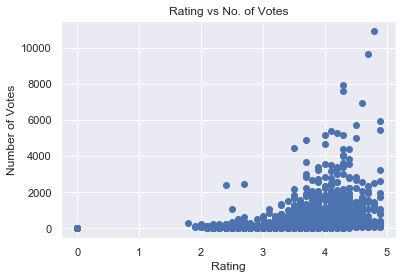

In [55]:
#Scatter plot of average ratings vs. number of votes
#Insight: Maximum number of votes concentrated in 3.5 to 4.5 region
ratings = dfIndia['Aggregate rating'].convert_objects(convert_numeric=True)
votes = dfIndia['Votes'].convert_objects(convert_numeric=True)
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Rating vs No. of Votes')
plt.scatter(ratings,votes)
plt.show()

In [56]:
#Checking citywise stats for average votes
#Insight: Best cities to open a restaurant - Bangalore
#Caveat: Max reviews may not correspond to number of people eating at restaurants
citywise_ratings = dfIndia[['City', 'Votes']]
citywise_stats = citywise_ratings.groupby('City', as_index = False).mean()
citywise_stats = citywise_stats.set_index('City')
citywise_stats.sort_values(by=['Votes'], ascending = False)

,Votes
City,
Bangalore,2805.750000
Kolkata,2229.650000
Mumbai,1484.850000
Chennai,1384.750000
Hyderabad,1340.833333
Pune,1036.600000
Secunderabad,951.000000
Panchkula,843.000000
Goa,754.900000


In [57]:
#Insight: Citywise correlation between average voters and ratings for restaurants
#Example: Mumbai in top 3 users for app but not in top 10 for best rated food
#Shows users looking for better food options. Potential to suggest client
citywise_ratings = dfIndia[['City', 'Aggregate rating']]
citywise_stats = citywise_ratings.groupby('City', as_index = False).mean()
citywise_stats = citywise_stats.set_index('City')
citywise_stats.sort_values(by=['Aggregate rating'], ascending = False)

,Aggregate rating
City,
Secunderabad,4.500000
Bangalore,4.375000
Hyderabad,4.344444
Chennai,4.315000
Mohali,4.300000
Kolkata,4.255000
Goa,4.245000
Pune,4.220000
Panchkula,4.200000


In [58]:
#Encoding string to numerics for new dataset
le_dict = {}
for col in dfIndia.dtypes[dfIndia.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    dfIndia[col] = le_dict[col].fit_transform(dfIndia[col].astype(str))

Restaurant Name
City
Country
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating color
Rating text


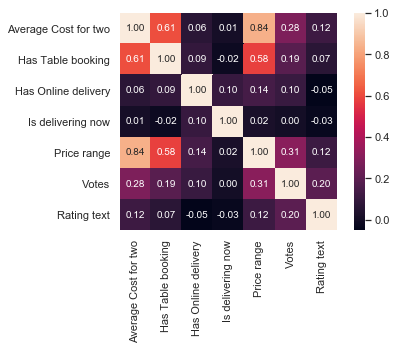

In [59]:
#Checking correlation across variables
cols = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',  'Is delivering now', 'Price range', 'Votes', 'Rating text',]
cor_matrix = np.corrcoef(dfIndia[cols].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols,xticklabels=cols)
plt.show()


In [60]:
dfIndia.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18277024,5047,1,31,0,6675,635,688,77.217747,28.620668,...,0,1,0,0,0,4,3.7,5,2,65
1,18428721,5283,1,31,0,5055,720,774,0.000000,0.000000,...,0,0,0,0,0,1,0.0,4,3,2
2,309466,1929,1,15,0,4689,652,705,77.039220,28.424913,...,0,0,1,0,0,2,3.4,2,0,138
3,18455511,387,1,31,0,7649,192,198,77.202912,28.707337,...,0,0,0,0,0,2,0.0,4,3,1
4,305826,1582,1,31,0,7612,656,709,77.219633,28.568063,...,0,0,0,0,0,2,3.8,5,2,68


In [61]:
def random_forest_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.3, 
                                                        random_state=21)
    rf = RandomForestRegressor(n_estimators=500,
                               min_samples_leaf=0.1,
                               random_state=21,
                              n_jobs=-1)
    rf.fit(X_train, y_train)
    return rf

In [80]:
feature_col = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating text',
       'Votes']

X = dfIndia[feature_col].values
y = dfIndia['Rating color'].values

rf = random_forest_regressor(X,y)


In [81]:
dfIndia.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Country',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [82]:
X.shape

(8652, 20)

In [83]:
y.shape

(8652,)

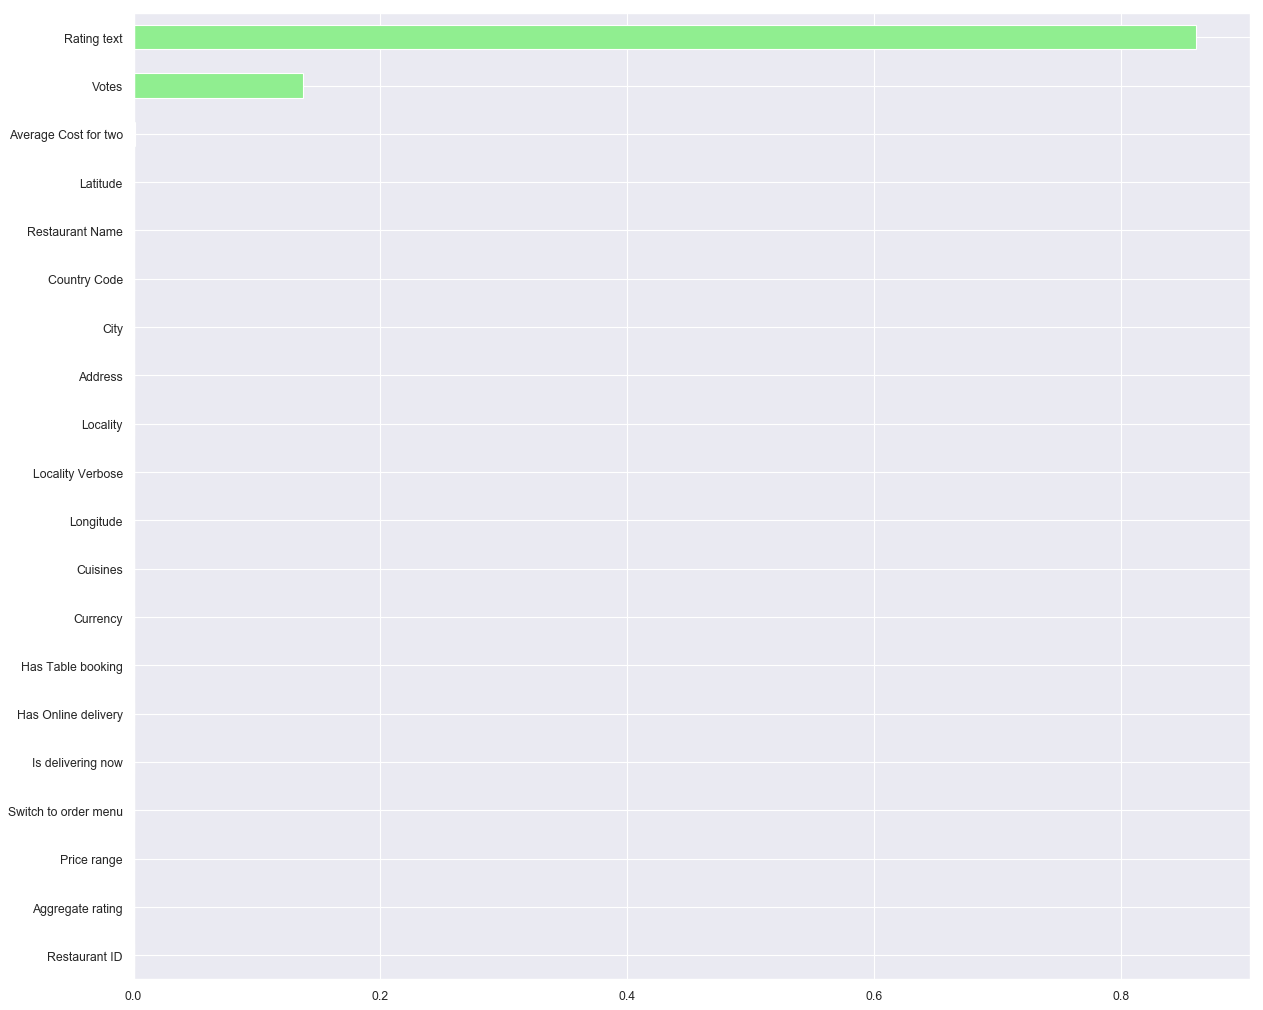

In [84]:
importances_rf = pd.Series(rf.feature_importances_, index = feature_col)
sorted_importances_rf = importances_rf.sort_values()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [30]:
# Building Train-Test Split 

In [85]:
validation_size = 0.20
seed = 321
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

# Comparing Different ML Models and their Accuracy


In [86]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

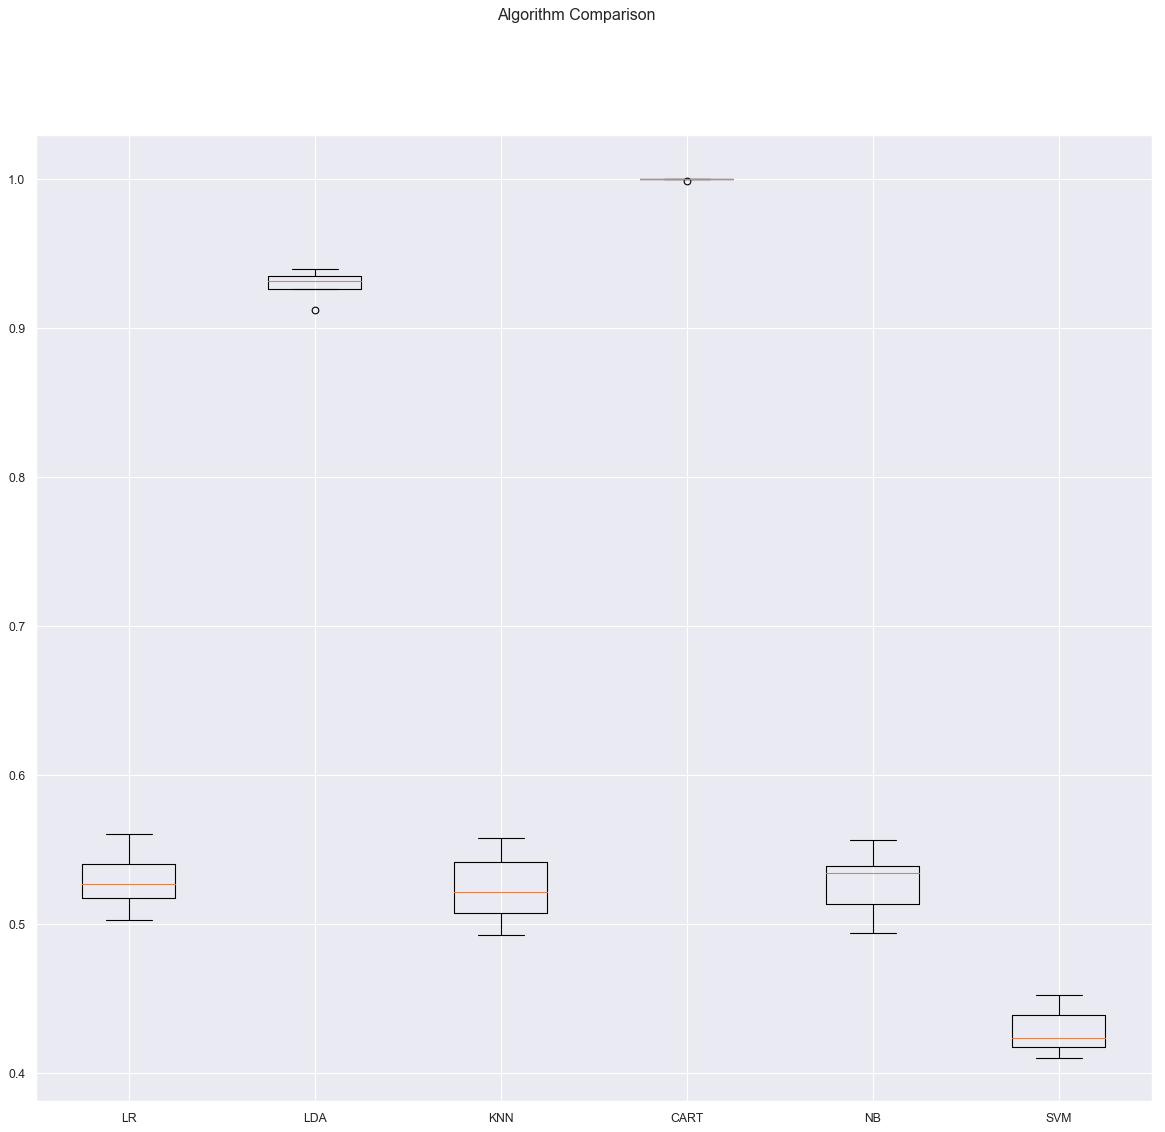

In [87]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [88]:
# Confusion Matrix using knn approach

In [89]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5303292894280762
[[  0  10   8   0   3   3]
 [  0  50  51   1  22  25]
 [  2   8 540   3 104  61]
 [  0   0  37   1   2   2]
 [  1   4 163   0 258  19]
 [  0  25 213   2  44  69]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.52      0.34      0.41       149
           2       0.53      0.75      0.62       718
           3       0.14      0.02      0.04        42
           4       0.60      0.58      0.59       445
           5       0.39      0.20      0.26       353

   micro avg       0.53      0.53      0.53      1731
   macro avg       0.36      0.31      0.32      1731
weighted avg       0.50      0.53      0.50      1731



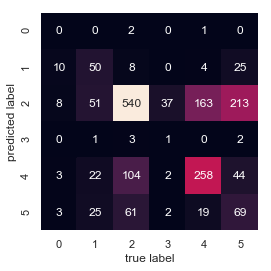

In [90]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_validation, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [91]:
dfIndia.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Country',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [92]:
# Linear Regression

In [93]:
X1 = dfIndia['Country']
y = dfIndia['Aggregate rating']
X4 = dfIndia['Has Table booking']
X3 = dfIndia['Has Online delivery']
X6 = dfIndia['Is delivering now']
X7 = dfIndia['Price range']
X5 = dfIndia['Average Cost for two']
lm = smf.ols(formula='y ~ X1 + X3 + X4 + X5 + X6 + X7', data=dfIndia).fit()
print(lm.params)
from patsy import dmatrices
import statsmodels.api as sm
Y,X=dmatrices("y~X1+X3+X4+X5+X6+X7", data= dfIndia)
model_fit = sm.OLS(y,X)
results = model_fit.fit()
print(results.summary())

Intercept    1.161944e+00
X1           1.730574e-13
X3           8.336722e-01
X4          -1.716641e-01
X5           1.590974e-04
X6          -1.518975e-01
X7           6.106660e-01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       Aggregate rating   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     508.1
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        14:01:39   Log-Likelihood:                -14733.
No. Observations:                8652   AIC:                         2.948e+04
Df Residuals:                    8646   BIC:                         2.952e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
             

In [ ]:

#Feature Selection

In [101]:
feature_col_1 = [
       'Average Cost for two',
       'Price range']

X1 = dfIndia[feature_col_1].values
y1 = dfIndia['Has Table booking'].values

X_train_1, X_validation_1, Y_train_1, Y_validation_1 = model_selection.train_test_split(X1, y1, test_size=validation_size, random_state=seed)


In [102]:
log_reg=LogisticRegression(solver='liblinear')

In [103]:
log_reg.fit(X_train_1,Y_train_1)
pred=log_reg.predict(X_validation_1)
log_reg.score(X_validation_1,Y_validation_1)

0.8977469670710572

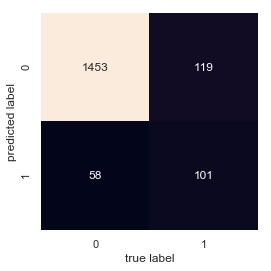

In [104]:
from sklearn.metrics import confusion_matrix
mat_1 = confusion_matrix(Y_validation_1, pred)
sns.heatmap(mat_1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [105]:
feature_col_2 = [
       'Average Cost for two',
        'Has Table booking']

X2 = dfIndia[feature_col_2].values
y2 = dfIndia['Price range'].values

X_train_2, X_validation_2, Y_train_2, Y_validation_2 = model_selection.train_test_split(X2, y2, test_size=validation_size, random_state=seed)

In [106]:
log_reg.fit(X_train_2,Y_train_2)
pred1=log_reg.predict(X_validation_2)
log_reg.score(X_validation_2,Y_validation_2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8867706528018486

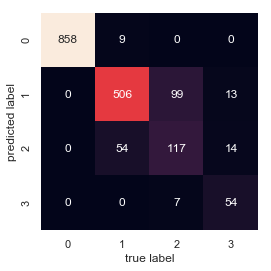

In [107]:
from sklearn.metrics import confusion_matrix
mat_2 = confusion_matrix(Y_validation_2, pred1)
sns.heatmap(mat_2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');